In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv(r'spam.csv', encoding='latin')
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3409,ham,Joy's father is John. Then John is the ____ of...,NaN,NaN,NaN
137,ham,No no. I will check all rooms befor activities,NaN,NaN,NaN
1934,ham,Hope you are having a great day.,NaN,NaN,NaN
5285,spam,URGENT! You have won a 1 week FREE membership ...,NaN,NaN,NaN
4633,ham,These won't do. Have to move on to morphine,NaN,NaN,NaN
2182,ham,PS U no ur a grown up now right?,NaN,NaN,NaN
1023,ham,May i call You later Pls,NaN,NaN,NaN
4287,ham,Hey mr whats the name of that bill brison book...,NaN,NaN,NaN
1406,spam,"URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD...",NaN,NaN,NaN
2308,spam,Moby Pub Quiz.Win a å£100 High Street prize if...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# 1.) Data Cleaning
- removing irrelevant columns
- encoding categorical labels in target column
- dealing with nulls
- dealing with duplciates

In [6]:
# Check if the three extra columns have any use or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
# since they are majority nulls we drop last 3 columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# Renaming the columns
df.columns = ['target', 'text']
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# Encoding the target column as binary
df['target'] = np.where(df['target']=='spam', 1, 0)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# checking for missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [21]:
# checking for duplicates
df.duplicated().sum()

403

In [23]:
# Dropping duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [25]:
df.shape

(5169, 2)

# 2.) EDA

In [26]:
# check if data imbalanced
df['target'].value_counts() 

0    4516
1     653
Name: target, dtype: int64

Data is imbalanced

In [27]:
# finding number of characters, number of words and number of sentences in each sms
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Atul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [28]:
df['num_characters'] = df['text'].apply(lambda x: len(x))
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [37]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
# For spam messages the sms characteristics are
df[df['target']==1].iloc[:,2:].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [40]:
# For ham messages the sms characteristics are
df[df['target']==0].iloc[:,2:].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


Therefore, on an avergae we can see that spam messages are longer in terms of characters, words and sentences

In [47]:
import matplotlib.pyplot as plt

(array([  7.,  16.,  23.,  23.,  47., 114., 358.,  62.,   2.,   1.]),
 array([ 13. ,  34.1,  55.2,  76.3,  97.4, 118.5, 139.6, 160.7, 181.8,
        202.9, 224. ]),
 <BarContainer object of 10 artists>)

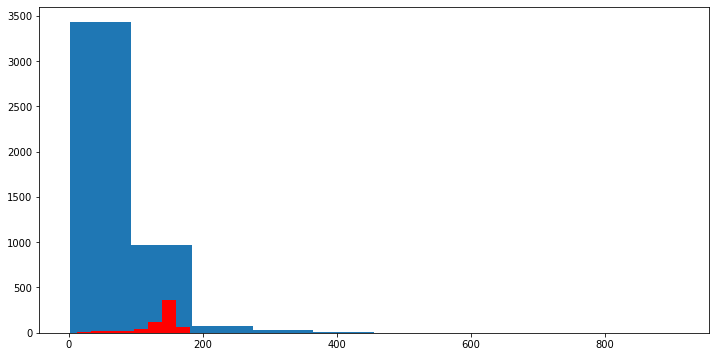

In [54]:
plt.figure(figsize=(12,6))
plt.hist(df[df['target']==0].iloc[:,2])
plt.hist(df[df['target']==1].iloc[:,2],color='red')

# 3.) Text Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuations
- Stemming/Lemmatizetion

In [76]:
# importing necessary modules
from nltk.corpus import stopwords # to remove stopwords
from nltk.stem.porter import PorterStemmer  # stemming
ps = PorterStemmer()
import string  # to remove punctuations

In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Atul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [80]:
# Creating a single function for the transformation
def transform_text(text):
    
    # converting to lower case
    text = text.lower()
    
    
    # Tokenization
    text = nltk.word_tokenize(text)
    
    
    # Removing special characters ($,#,etc we we keep only aplhanumeric characters)
    y = []
    for i in text:
        if i.isalnum():  
            y.append(i)
    # 'Hi how% $200 Are You' becomes ['hi', 'how', '200', 'are', 'you']
    text = y[:]  # if we do text = y then the will point to same location and hence if we clear y again then text also gets cleared
    
    
    
    # Removing stop words and punctuations (technically puntuations taken care in above step but better to be explicit)
    #(Stop words are words that appear in high frequency in sentences but dont necessarily add much meaning/context)
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) 
    #'Hi, Did you Like my $2000 coat I wore to the %%ML conference??' becomes ['hi', 'like', '2000', 'coat', 'wore', 'ml', 'conference']
    text = y[:]  #cloning
    
    
    
    # Stemming (getting the root form of words so that words like love,loving,loved are not treated as separate entitites)
    y = []
    for i in text:
        y.append(ps.stem(i))
    # 'I loved youtube Lectures on Machine LEarning, How about you??' becomes ['love', 'youtub', 'lectur', 'machin', 'learn']
    text = y[:]
    
    
    return " ".join(text)
            
    

In [83]:
df['text'].iloc[5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [84]:
transform_text(df['text'].iloc[5])

'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv'

Applying the transformations on the sms text

In [86]:
df['transformed_text'] = df['text'].apply(transform_text) #creating a new column so that if anything goes wrong in future we can revert easily
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Generating Word Cloud to see most frequent words in spam and non-spam messages

In [89]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [90]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

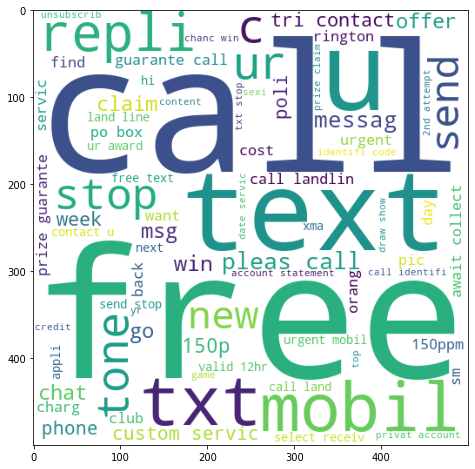

In [92]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [93]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

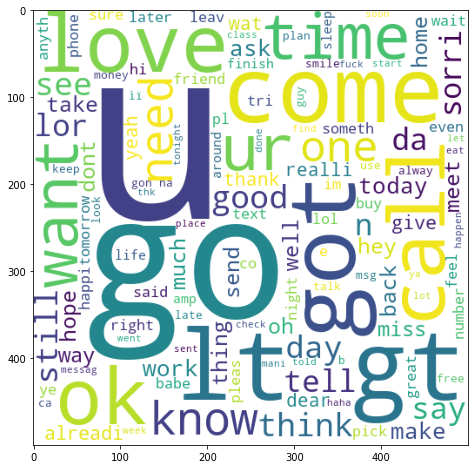

In [94]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

### Finding top 30 most frequent words in spam and non-spam messages

In [95]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [96]:
len(spam_corpus)

9939

In [99]:
from collections import Counter

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

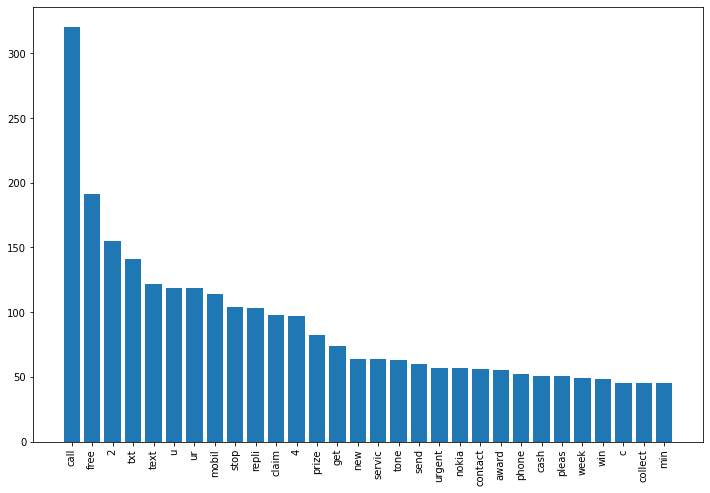

In [104]:
plt.figure(figsize = (12,8))
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

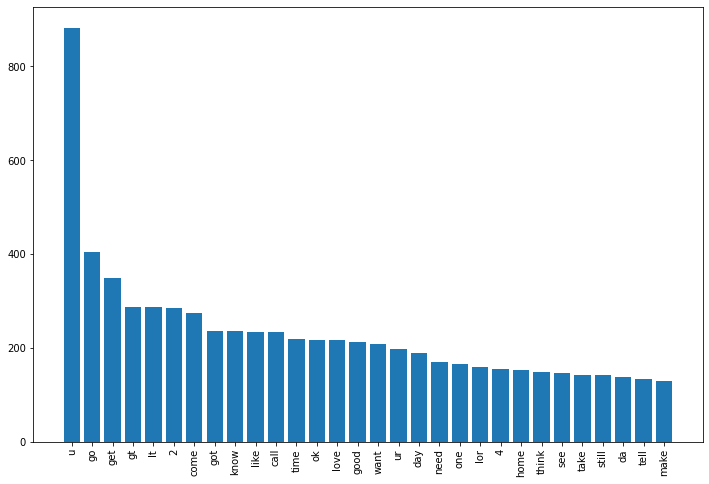

In [105]:
non_spam_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        non_spam_corpus.append(word)


plt.figure(figsize = (12,8))
plt.bar(pd.DataFrame(Counter(non_spam_corpus).most_common(30))[0], pd.DataFrame(Counter(non_spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)

# 4.) Text Vectorization
- can use BagOfWords, Tfidf or Word2Vec. We use Bag of words for now where we find n most frequent words in our entire corpus of training data then we convert each text input as a x dim vector where x is the x most frequent words from our bag/corpus of words. ex we choose x as 5 and the 5 most frquent words in our bag are a,b,c,d,e then each input text is replaced by a vector [ca,cb,cc,cd,ce] where ca is count of number of times word 'a' appeared in this text input and so on

In [108]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()  # can set max_features = x to limit the size of our vector to consider only top x most frequent words

In [109]:
X = cv.fit_transform(df['transformed_text']).toarray()  #toarray() used to convert scipy array output to dense numpy array

In [111]:
X.shape

(5169, 6708)

In [112]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [113]:
y = df['target'].values

In [114]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify = y)  #since we have imbalanced dataset we stratify

# 5.) Model Building

### i.) Naive Bayes
(works very well for textual data)

In [120]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB # since we dont know the distribution of the data we use all 3
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score # since we have imbalanced dataset we use other metrics than accuracy

In [121]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Since it is an imblanced dataset our focus will be on maximizing precision score rather than accuracy (accuracy is just the satsficing metric and precision is our optimizing metric)

In [122]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test) 
print(f"accuracy score for gaussian naive bayes is {accuracy_score(y_test,y_pred_gnb)}")
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_gnb))
print(f"Precision score for gaussian naive bayes is {precision_score(y_test,y_pred_gnb)}")

accuracy score for gaussian naive bayes is 0.879110251450677
Confusion matrix:
[[789 114]
 [ 11 120]]
Precision score for gaussian naive bayes is 0.5128205128205128


In [124]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test) 
print(f"accuracy score for multinomial naive bayes is {accuracy_score(y_test,y_pred_mnb)}")
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_mnb))
print(f"Precision score for multinomial naive bayes is {precision_score(y_test,y_pred_mnb)}")

accuracy score for multinomial naive bayes is 0.9709864603481625
Confusion matrix:
[[879  24]
 [  6 125]]
Precision score for multinomial naive bayes is 0.8389261744966443


In [125]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test) 
print(f"accuracy score for bernoulli naive bayes is {accuracy_score(y_test,y_pred_bnb)}")
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_bnb))
print(f"Precision score for bernoulli naive bayes is {precision_score(y_test,y_pred_bnb)}")

accuracy score for bernoulli naive bayes is 0.97678916827853
Confusion matrix:
[[901   2]
 [ 22 109]]
Precision score for bernoulli naive bayes is 0.9819819819819819


Thus, Bernoulli Naive Bayes is our best performing model as it gives highest precision

## Mini experiment to check if results can be improved if we use Tfidf vectorizer

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()  

X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()  #toarray() used to convert scipy array output to dense numpy array

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=2, stratify = y)  #since we have imbalanced dataset we stratify

gnb_tfidf = GaussianNB()
mnb_tfidf = MultinomialNB()
bnb_tfidf = BernoulliNB()

gnb_tfidf.fit(X_train, y_train)
y_pred_gnb = gnb_tfidf.predict(X_test) 
print(f"accuracy score for gaussian naive bayes is {accuracy_score(y_test,y_pred_gnb)}")
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_gnb))
print(f"Precision score for gaussian naive bayes is {precision_score(y_test,y_pred_gnb)}")

mnb_tfidf.fit(X_train, y_train)
y_pred_mnb = mnb_tfidf.predict(X_test) 
print(f"accuracy score for multinomial naive bayes is {accuracy_score(y_test,y_pred_mnb)}")
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_mnb))
print(f"Precision score for multinomial naive bayes is {precision_score(y_test,y_pred_mnb)}")

bnb_tfidf.fit(X_train, y_train)
y_pred_bnb = bnb_tfidf.predict(X_test) 
print(f"accuracy score for bernoulli naive bayes is {accuracy_score(y_test,y_pred_bnb)}")
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_bnb))
print(f"Precision score for bernoulli naive bayes is {precision_score(y_test,y_pred_bnb)}")


accuracy score for gaussian naive bayes is 0.8771760154738878
Confusion matrix:
[[790 113]
 [ 14 117]]
Precision score for gaussian naive bayes is 0.508695652173913
accuracy score for multinomial naive bayes is 0.9671179883945842
Confusion matrix:
[[903   0]
 [ 34  97]]
Precision score for multinomial naive bayes is 1.0
accuracy score for bernoulli naive bayes is 0.97678916827853
Confusion matrix:
[[901   2]
 [ 22 109]]
Precision score for bernoulli naive bayes is 0.9819819819819819


#### Thus, we can see from our experiment the best precision score and hence, our final choice will be Tfidf vectorization and using Multinomial Naive Bayes model

## ii.) Experimenting with other ML models

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()  

X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()  #toarray() used to convert scipy array output to dense numpy array
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=2, stratify = y)  #since we have imbalanced dataset we stratify

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


In [143]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [144]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [147]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(['Precision','Accuracy'],ascending=[False,False])
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.980658,1.000000
2,NB,0.967118,1.000000
1,KN,0.901354,1.000000
8,ETC,0.978723,0.990991
0,SVC,0.984526,0.983193
10,xgb,0.972921,0.955752
9,GBDT,0.954545,0.937500
4,LR,0.956480,0.930000
6,AdaBoost,0.965184,0.920354
7,BgC,0.965184,0.880000


In [148]:
df1 = performance_df # results without any optimization
df1

,Algorithm,Accuracy,Precision
5,RF,0.980658,1.000000
2,NB,0.967118,1.000000
1,KN,0.901354,1.000000
8,ETC,0.978723,0.990991
0,SVC,0.984526,0.983193
10,xgb,0.972921,0.955752
9,GBDT,0.954545,0.937500
4,LR,0.956480,0.930000
6,AdaBoost,0.965184,0.920354
7,BgC,0.965184,0.880000


#### Thus, we can see that without any optmization based on precision and then accuracy Random Forest, Naive Bayes and KNN are performing the best. 

## iii.) Optimizations : 
we can check few more optimizations if they improve accuracy also further and maintain precision.

a.) changing the max_features paramater of Tfidf to limit the vector length which may prevent overfitting

b.) apply min-max scalar to input data

c.) include the custom "number of characters" column we had created in our input vector

d.) Creating an ensemble classifier using two highest precision models after our above 3 experiments



### a.) Keeping max_features = 3000 in tfidf vectorizer

In [149]:
tfidf = TfidfVectorizer(max_features=3000)  

X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()  #toarray() used to convert scipy array output to dense numpy array
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=2, stratify = y)  #since we have imbalanced dataset we stratify

In [150]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_n3000':accuracy_scores,'Precision_n3000':precision_scores}).sort_values(['Precision_n3000','Accuracy_n3000'],ascending=[False,False])


,Algorithm,Accuracy_n3000,Precision_n3000
8,ETC,0.987427,1.000000
5,RF,0.984526,1.000000
2,NB,0.983559,1.000000
1,KN,0.914894,1.000000
0,SVC,0.987427,0.975806
9,GBDT,0.957447,0.967742
4,LR,0.960348,0.932692
10,xgb,0.970019,0.923729
6,AdaBoost,0.965184,0.905983
7,BgC,0.964217,0.861538


In [151]:
df2 = performance_df  # results after setting max_features paramater of tfidf as 3000
df2

,Algorithm,Accuracy_n3000,Precision_n3000
8,ETC,0.987427,1.000000
5,RF,0.984526,1.000000
2,NB,0.983559,1.000000
1,KN,0.914894,1.000000
0,SVC,0.987427,0.975806
9,GBDT,0.957447,0.967742
4,LR,0.960348,0.932692
10,xgb,0.970019,0.923729
6,AdaBoost,0.965184,0.905983
7,BgC,0.964217,0.861538


In [152]:
final_df = df1.merge(df2,on='Algorithm')
final_df

,Algorithm,Accuracy,Precision,Accuracy_n3000,Precision_n3000
0,RF,0.980658,1.000000,0.984526,1.000000
1,NB,0.967118,1.000000,0.983559,1.000000
2,KN,0.901354,1.000000,0.914894,1.000000
3,ETC,0.978723,0.990991,0.987427,1.000000
4,SVC,0.984526,0.983193,0.987427,0.975806
5,xgb,0.972921,0.955752,0.970019,0.923729
6,GBDT,0.954545,0.937500,0.957447,0.967742
7,LR,0.956480,0.930000,0.960348,0.932692
8,AdaBoost,0.965184,0.920354,0.965184,0.905983
9,BgC,0.965184,0.880000,0.964217,0.861538


Thus, we can see that setting max_features to 3000 definitely improves our results (maintains high precision as well as increases accuracy) so we will keep this optimization in our final model

### b.) Min-Max Scaling the input vectors

In [167]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tfidf = TfidfVectorizer(max_features=3000)  

X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()  #toarray() used to convert scipy array output to dense numpy array
X_tfidf = scaler.fit_transform(X_tfidf)

y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=2, stratify = y)  #since we have imbalanced dataset we stratify

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_n_3000_scaling':accuracy_scores,'Precision_n3000_scaling':precision_scores}).sort_values(['Precision_n3000_scaling','Accuracy_n3000_scaling'],ascending=[False,False])


In [177]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_n3000_scaling':accuracy_scores,'Precision_n3000_scaling':precision_scores}).sort_values(['Precision_n3000_scaling','Accuracy_n3000_scaling'],ascending=[False,False])

In [178]:
df3 = performance_df  # results after setting max_features paramater of tfidf as 3000 and min-max scaling the inputs
df3

,Algorithm,Accuracy_n3000_scaling,Precision_n3000_scaling
8,ETC,0.987427,1.000000
5,RF,0.984526,1.000000
1,KN,0.908124,0.973684
9,GBDT,0.957447,0.967742
2,NB,0.988395,0.954198
4,LR,0.970019,0.938596
10,xgb,0.970019,0.923729
0,SVC,0.975822,0.920635
6,AdaBoost,0.965184,0.905983
7,BgC,0.964217,0.861538


In [179]:
final_df = final_df.merge(df3,on='Algorithm')
final_df

,Algorithm,Accuracy,Precision,Accuracy_n3000,Precision_n3000,Accuracy_n3000_scaling,Precision_n3000_scaling
0,RF,0.980658,1.000000,0.984526,1.000000,0.984526,1.000000
1,NB,0.967118,1.000000,0.983559,1.000000,0.988395,0.954198
2,KN,0.901354,1.000000,0.914894,1.000000,0.908124,0.973684
3,ETC,0.978723,0.990991,0.987427,1.000000,0.987427,1.000000
4,SVC,0.984526,0.983193,0.987427,0.975806,0.975822,0.920635
5,xgb,0.972921,0.955752,0.970019,0.923729,0.970019,0.923729
6,GBDT,0.954545,0.937500,0.957447,0.967742,0.957447,0.967742
7,LR,0.956480,0.930000,0.960348,0.932692,0.970019,0.938596
8,AdaBoost,0.965184,0.920354,0.965184,0.905983,0.965184,0.905983
9,BgC,0.965184,0.880000,0.964217,0.861538,0.964217,0.861538


Scaling is definitely worseing our results and hence, we won't do it for further steps

### c.) including the custom num_characters column in our input vector
since scaling is worsening the results we won't do  it. We will just keep max_features as 3000 as it had improved the result

In [181]:
tfidf = TfidfVectorizer(max_features=3000)  

X_tfidf = np.hstack((tfidf.fit_transform(df['transformed_text']).toarray(), df['num_characters'].values.reshape(-1,1)))  #toarray() used to convert scipy array output to dense numpy array

y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=2, stratify = y)  #since we have imbalanced dataset we stratify

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

In [183]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_n3000_numchars':accuracy_scores,'Precision_n3000_numchars':precision_scores}).sort_values(['Precision_n3000_numchars','Accuracy_n3000_numchars'],ascending=[False,False])


In [184]:
df4 = performance_df  # results after setting max_features paramater of tfidf as 3000 and min-max scaling the inputs
df4

,Algorithm,Accuracy_n3000_numchars,Precision_n3000_numchars
2,NB,0.948743,1.000000
8,ETC,0.988395,0.983740
5,RF,0.976789,0.981982
10,xgb,0.977756,0.942623
7,BgC,0.972921,0.925620
4,LR,0.962282,0.918182
3,DT,0.951644,0.909091
9,GBDT,0.956480,0.898148
6,AdaBoost,0.963250,0.884298
1,KN,0.915861,0.659420


In [185]:
final_df = final_df.merge(df4,on='Algorithm')
final_df

,Algorithm,Accuracy,Precision,Accuracy_n3000,Precision_n3000,Accuracy_n3000_scaling,Precision_n3000_scaling,Accuracy_n3000_numchars,Precision_n3000_numchars
0,RF,0.980658,1.000000,0.984526,1.000000,0.984526,1.000000,0.976789,0.981982
1,NB,0.967118,1.000000,0.983559,1.000000,0.988395,0.954198,0.948743,1.000000
2,KN,0.901354,1.000000,0.914894,1.000000,0.908124,0.973684,0.915861,0.659420
3,ETC,0.978723,0.990991,0.987427,1.000000,0.987427,1.000000,0.988395,0.983740
4,SVC,0.984526,0.983193,0.987427,0.975806,0.975822,0.920635,0.873308,0.000000
5,xgb,0.972921,0.955752,0.970019,0.923729,0.970019,0.923729,0.977756,0.942623
6,GBDT,0.954545,0.937500,0.957447,0.967742,0.957447,0.967742,0.956480,0.898148
7,LR,0.956480,0.930000,0.960348,0.932692,0.970019,0.938596,0.962282,0.918182
8,AdaBoost,0.965184,0.920354,0.965184,0.905983,0.965184,0.905983,0.963250,0.884298
9,BgC,0.965184,0.880000,0.964217,0.861538,0.964217,0.861538,0.972921,0.925620


Adding the num_characters feature is not helping improve our results and hence, we wont include it in further steps.

### d.) Creating an Ensemble classifier
from our above 3 optimizations we see only keeping max_features=3000 improved our results wheras b and c didnt so we wont do them in further step

In [186]:
tfidf = TfidfVectorizer(max_features=3000)  

X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()  #toarray() used to convert scipy array output to dense numpy array
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=2, stratify = y)  #since we have imbalanced dataset we stratify

In [187]:
# using our 3 best classifiers
svc = SVC(kernel='sigmoid',gamma=0.1,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [188]:
from sklearn.ensemble import VotingClassifier

In [189]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)], voting='soft')

In [190]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=0.1, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [191]:
y_pred = voting.predict(X_test)
print('Accuracy is ',accuracy_score(y_test, y_pred))
print('Precision is ',precision_score(y_test, y_pred))

Accuracy is  0.9874274661508704
Precision is  0.9836065573770492


Since precision is our main metric and voting is worsening that we won't move ahead with this model

## CONCLUSION: Thus, from all our experiments we conclude that Multinomial Naive Bayes with tfidf vectorization is our best performing model and we will move ahead with it

# 6.) Creating our final optimized model 

In [192]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)  

X_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()  #toarray() used to convert scipy array output to dense numpy array
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=2, stratify = y)  #since we have imbalanced dataset we stratify

mnb = MultinomialNB()

mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test) 
print(f"accuracy score for multinomial naive bayes is {accuracy_score(y_test,y_pred_mnb)}")
print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred_mnb))
print(f"Precision score for multinomial naive bayes is {precision_score(y_test,y_pred_mnb)}")


accuracy score for multinomial naive bayes is 0.9835589941972921
Confusion matrix:
[[903   0]
 [ 17 114]]
Precision score for multinomial naive bayes is 1.0


#  7.) Pickling all required objects to build the model pipeline
We would need:
- trained mnb model
- fit tfidf vectorizer
- the data cleaning function we had created above - we can copy paste this entire function further so no need to pickle

In [193]:
import pickle

In [ ]:
pickle.dump(tfidf)